# Random Fields

abalone
Total: 4177 | Obs: 125 (2.9925784055542257%)


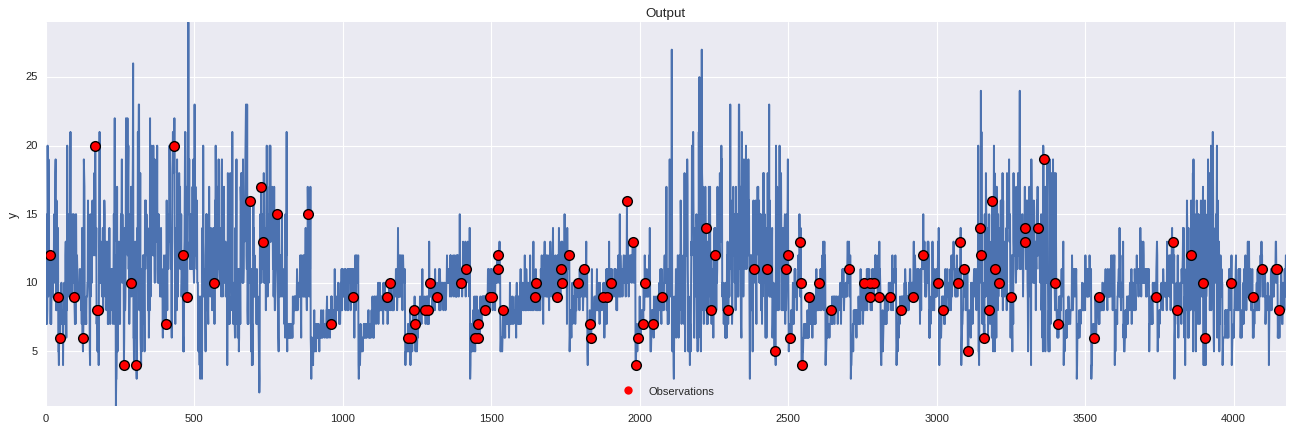

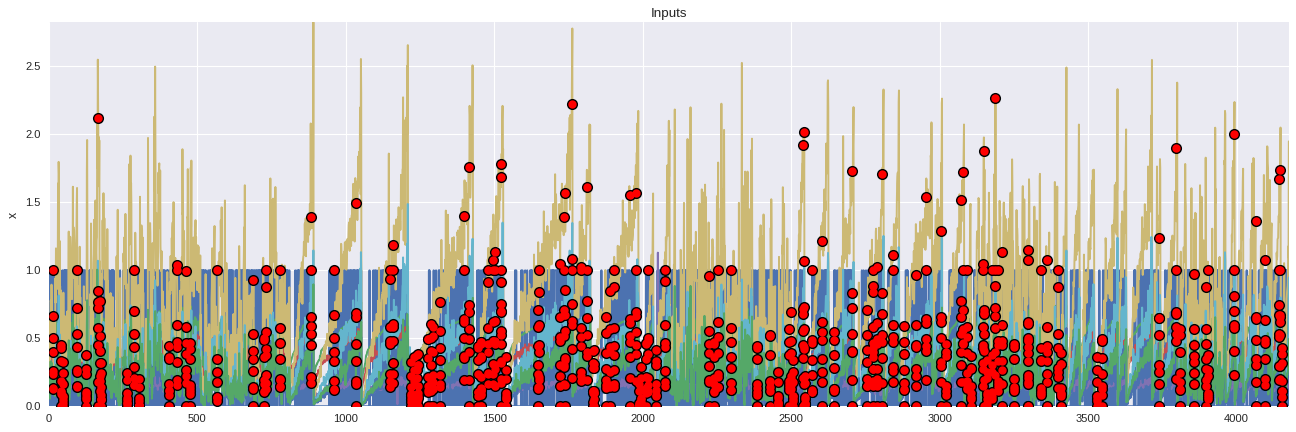

In [1]:
%reload_ext autoreload
%reload_ext line_profiler
%autoreload 2
%matplotlib inline

import g3py as g3

g3.style_seaborn()

psamples = 0.03
random = True

x, y = g3.data_abalone()
if random:
    obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, psamples, plot=True)
else:
    obs_j = np.array([  37,   62,   86,  124,  141,  144,  170,  215,  217,  230,  250,
        272,  378,  421,  528,  598,  608,  654,  798,  803,  806,  830,
        945,  959,  967,  972, 1032, 1049, 1050, 1053, 1070, 1077, 1078,
       1083, 1100, 1163, 1230, 1285, 1289, 1323, 1354, 1355, 1381, 1443,
       1445, 1490, 1502, 1521, 1531, 1563, 1605, 1612, 1626, 1645, 1680,
       1733, 1764, 1800, 1818, 1841, 1992, 2016, 2198, 2305, 2312, 2377,
       2381, 2408, 2452, 2501, 2506, 2513, 2540, 2641, 2695, 2728, 2733,
       2754, 2793, 2820, 2846, 2900, 2928, 2934, 2935, 2965, 2985, 3008,
       3009, 3049, 3085, 3107, 3161, 3277, 3287, 3304, 3326, 3327, 3344,
       3365, 3387, 3414, 3417, 3425, 3543, 3557, 3584, 3620, 3630, 3652,
       3673, 3699, 3781, 3856, 3858, 3897, 3957, 4042, 4054, 4056, 4066,
       4085, 4095, 4148, 4149])

## Prior Random Fields

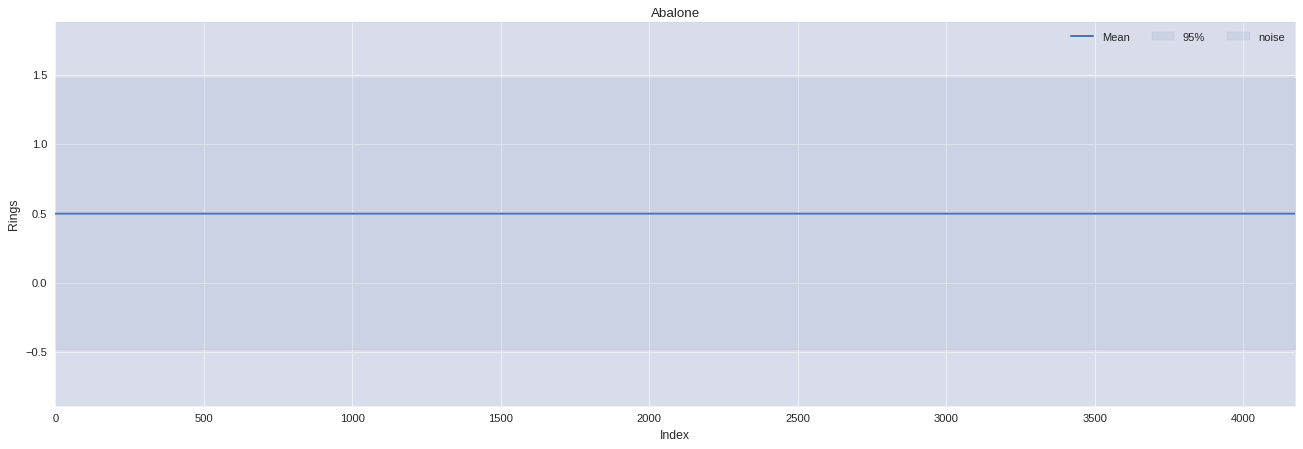

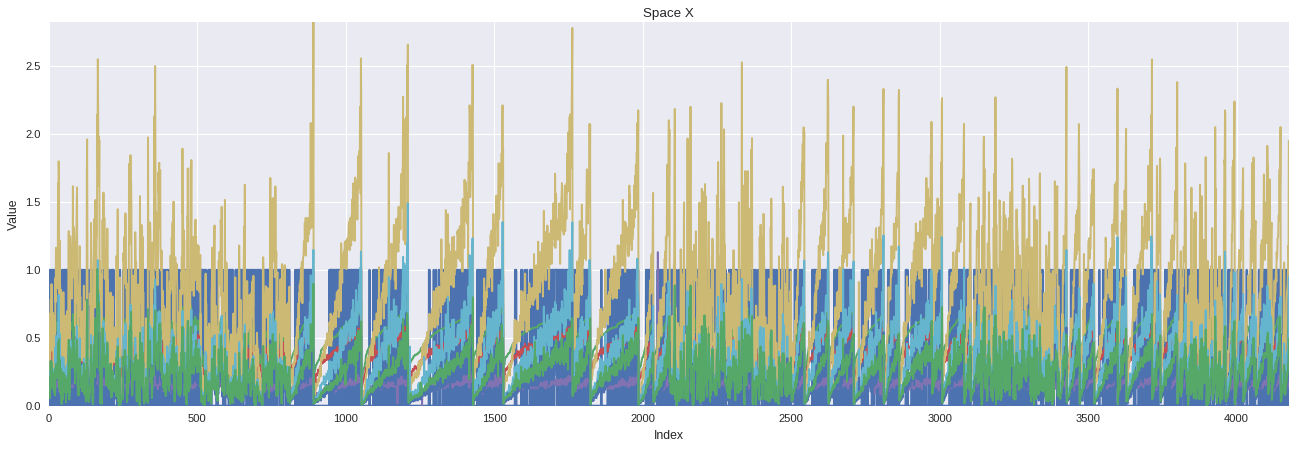

In [2]:
gp = g3.WGP(space=x, location=g3.Bias(), kernel=g3.SE(), mapping=g3.BoxCoxLinear(), noisy=True)
gp.describe('Abalone','Index','Rings')
gp.plot(plot_space=True)

## Posterior Random Fields

{'WGP_Bias_Bias': 9.7679996,
 'WGP_BoxCoxLinear_power_log_': array(0.0, dtype=float32),
 'WGP_BoxCoxLinear_scale_log_': array(0.0, dtype=float32),
 'WGP_BoxCoxLinear_shift': 1.0,
 'WGP_Noise_var_log_': array(2.251941680908203, dtype=float32),
 'WGP_SE_rate_log_': array([ 0.08408314,  1.39211762,  1.5695194 ,  2.49691367, -0.08915487,
         0.770917  ,  1.45102215,  1.10797882], dtype=float32),
 'WGP_SE_var_log_': array(2.251941680908203, dtype=float32),
 '_l1': 1.6699424,
 '_l2': 5.6349707,
 '_ll': array(-299.259033203125, dtype=float32)}

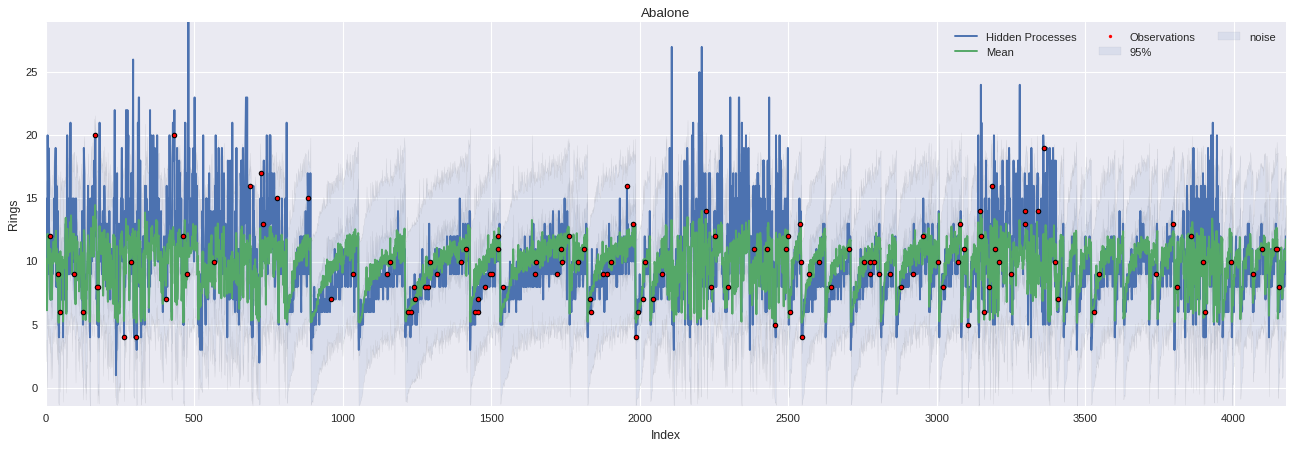

In [3]:
gp.observed(inputs=x_obs, outputs=y_obs, index=obs_j, hidden=y)
gp.plot()
gp.eval_params(gp.params)

In [ ]:
gp.widget()

## Find MAP

In [4]:
params = gp.find_MAP(points=4)

'Starting function value (-logp): 299.259'
'start_bfgs'
         Current function value: 249.638840
         Iterations: 44
         Function evaluations: 77
         Gradient evaluations: 64
'start_powell'
Optimization terminated successfully.
         Current function value: 268.806458
         Iterations: 19
         Function evaluations: 4018
'start_bfgs_powell'
Optimization terminated successfully.
         Current function value: 249.637802
         Iterations: 1
         Function evaluations: 344
'start_powell_bfgs'
         Current function value: 249.642517
         Iterations: 52
         Function evaluations: 149
         Gradient evaluations: 137
{'WGP_Bias_Bias': array(15.059404373168945, dtype=float32),
 'WGP_BoxCoxLinear_power_log_': array(-5.6442131996154785, dtype=float32),
 'WGP_BoxCoxLinear_scale_log_': array(12.732497215270996, dtype=float32),
 'WGP_BoxCoxLinear_shift': array(-2.0523576736450195, dtype=float32),
 'WGP_Noise_var_log_': array(-3.0130863189697266, dtyp

{'WGP_Bias_Bias': array(15.059404373168945, dtype=float32),
 'WGP_BoxCoxLinear_power_log_': array(-5.6442131996154785, dtype=float32),
 'WGP_BoxCoxLinear_scale_log_': array(12.732497215270996, dtype=float32),
 'WGP_BoxCoxLinear_shift': array(-2.0523576736450195, dtype=float32),
 'WGP_Noise_var_log_': array(-3.0130863189697266, dtype=float32),
 'WGP_SE_rate_log_': array([ -1.91557813,  -7.59833717,   1.51018405,  -9.56613541,
         -0.57772994,   0.22307587, -10.9391737 ,   1.15176225], dtype=float32),
 'WGP_SE_var_log_': array(-0.02104346826672554, dtype=float32),
 '_l1': 1.5449576,
 '_l2': 5.1017318,
 '_ll': array(-249.63780212402344, dtype=float32)}

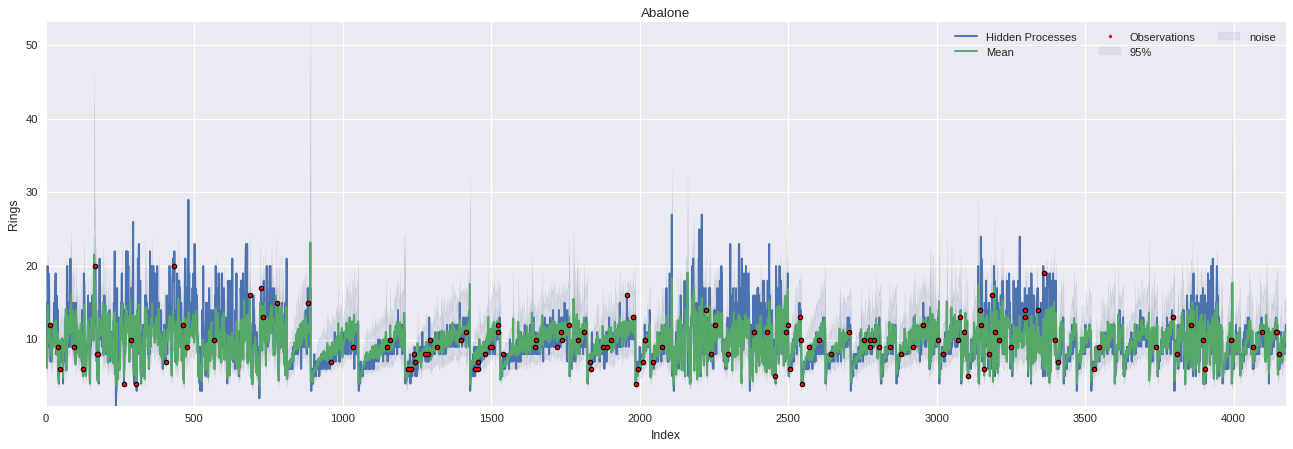

In [5]:
gp.plot(params)
gp.eval_params(params)

## Sampling Hyperparameters with Ensemble MCMC

In [6]:
file = 'datatrace_random_fields.h5'
try:
    datatrace = g3.load_datatrace(file)
except:
    datatrace = gp.sample_hypers(start=params, samples=10000)
    g3.save_datatrace(datatrace, file)
datatrace

WGP_BoxCoxLinear_power_log_  WGP_BoxCoxLinear_scale_log_  \
0                         -0.816940                     0.423403   
1                         -0.816940                     0.423403   
2                         -0.816940                     0.423403   
3                         -0.816940                     0.423403   
4                         -0.816940                     0.423403   
5                         -0.816940                     0.423403   
6                         -0.816940                     0.423403   
7                         -0.816940                     0.423403   
8                         -0.816940                     0.423403   
9                         -0.816940                     0.423403   
10                        -0.816940                     0.423403   
11                        -0.816940                     0.423403   
12                        -0.816940                     0.423403   
13                        -0.816940                     0.423403   
14                        -0.725936                     0.535199   
15                        -0.746762                     0.547192   
16                        -0.746762                     0.547192   
17                        -0.746762                     0.547192   
18                        -0.746762                     0.547192   
19                        -0.746762                     0.547192   
20                        -0.746762                     0.547192   
21                        -0.746762                     0.547192   
22                        -0.746762                     0.547192   
23                        -0.770043                     0.582861   
24                        -0.770043                     0.582861   
25                        -0.770043                     0.582861   
26                        -0.770043                     0.582861   
27                        -0.770043                     0.582861   
28                        -0.770043                     0.582861   
29                        -0.770043                     0.582861   
...                             ...                          ...   
279970                    -2.891044                     3.516343   
279971                    -3.174083                     3.956374   
279972                    -3.174083                     3.956374   
279973                    -3.174083                     3.956374   
279974                    -3.132126                     3.893276   
279975                    -3.132126                     3.893276   
279976                    -3.058253                     3.788998   
279977                    -3.058253                     3.788998   
279978                    -3.058253                     3.788998   
279979                    -3.058253                     3.788998   
279980                    -3.058253                     3.788998   
279981                    -3.058253                     3.788998   
279982                    -3.058253                     3.788998   
279983                    -3.058253                     3.788998   
279984                    -3.058253                     3.788998   
279985                    -3.058253                     3.788998   
279986                    -3.058253                     3.788998   
279987                    -3.058253                     3.788998   
279988                    -3.058253                     3.788998   
279989                    -3.058253                     3.788998   
279990                    -3.058253                     3.788998   
279991                    -3.058253                     3.788998   
279992                    -3.058253                     3.788998   
279993                    -3.058253                     3.788998   
279994                    -3.058253                     3.788998   
279995                    -3.058253                     3.788998   
279996                    -3.058253                     3.788998

In [7]:
chains = g3.datatrace_to_chains(gp, datatrace[datatrace._niter == datatrace._niter.max()])
dt2 = gp.sample_hypers(start=chains, samples=10000)
dt2._niter += datatrace._niter.max() + 1
datatrace = datatrace.append(dt2, ignore_index=True)
datatrace = datatrace.reset_index()
del datatrace['index']
datatrace._burnin = datatrace._niter > 12000

Sampling 14 variables, 28 chains, 10000 times (None temps)


100%|██████████| 10000/10000 [05:34<00:00, 29.91it/s]


## Convergene Diagnostic

In [11]:
datatrace._burnin = datatrace._niter > 2000

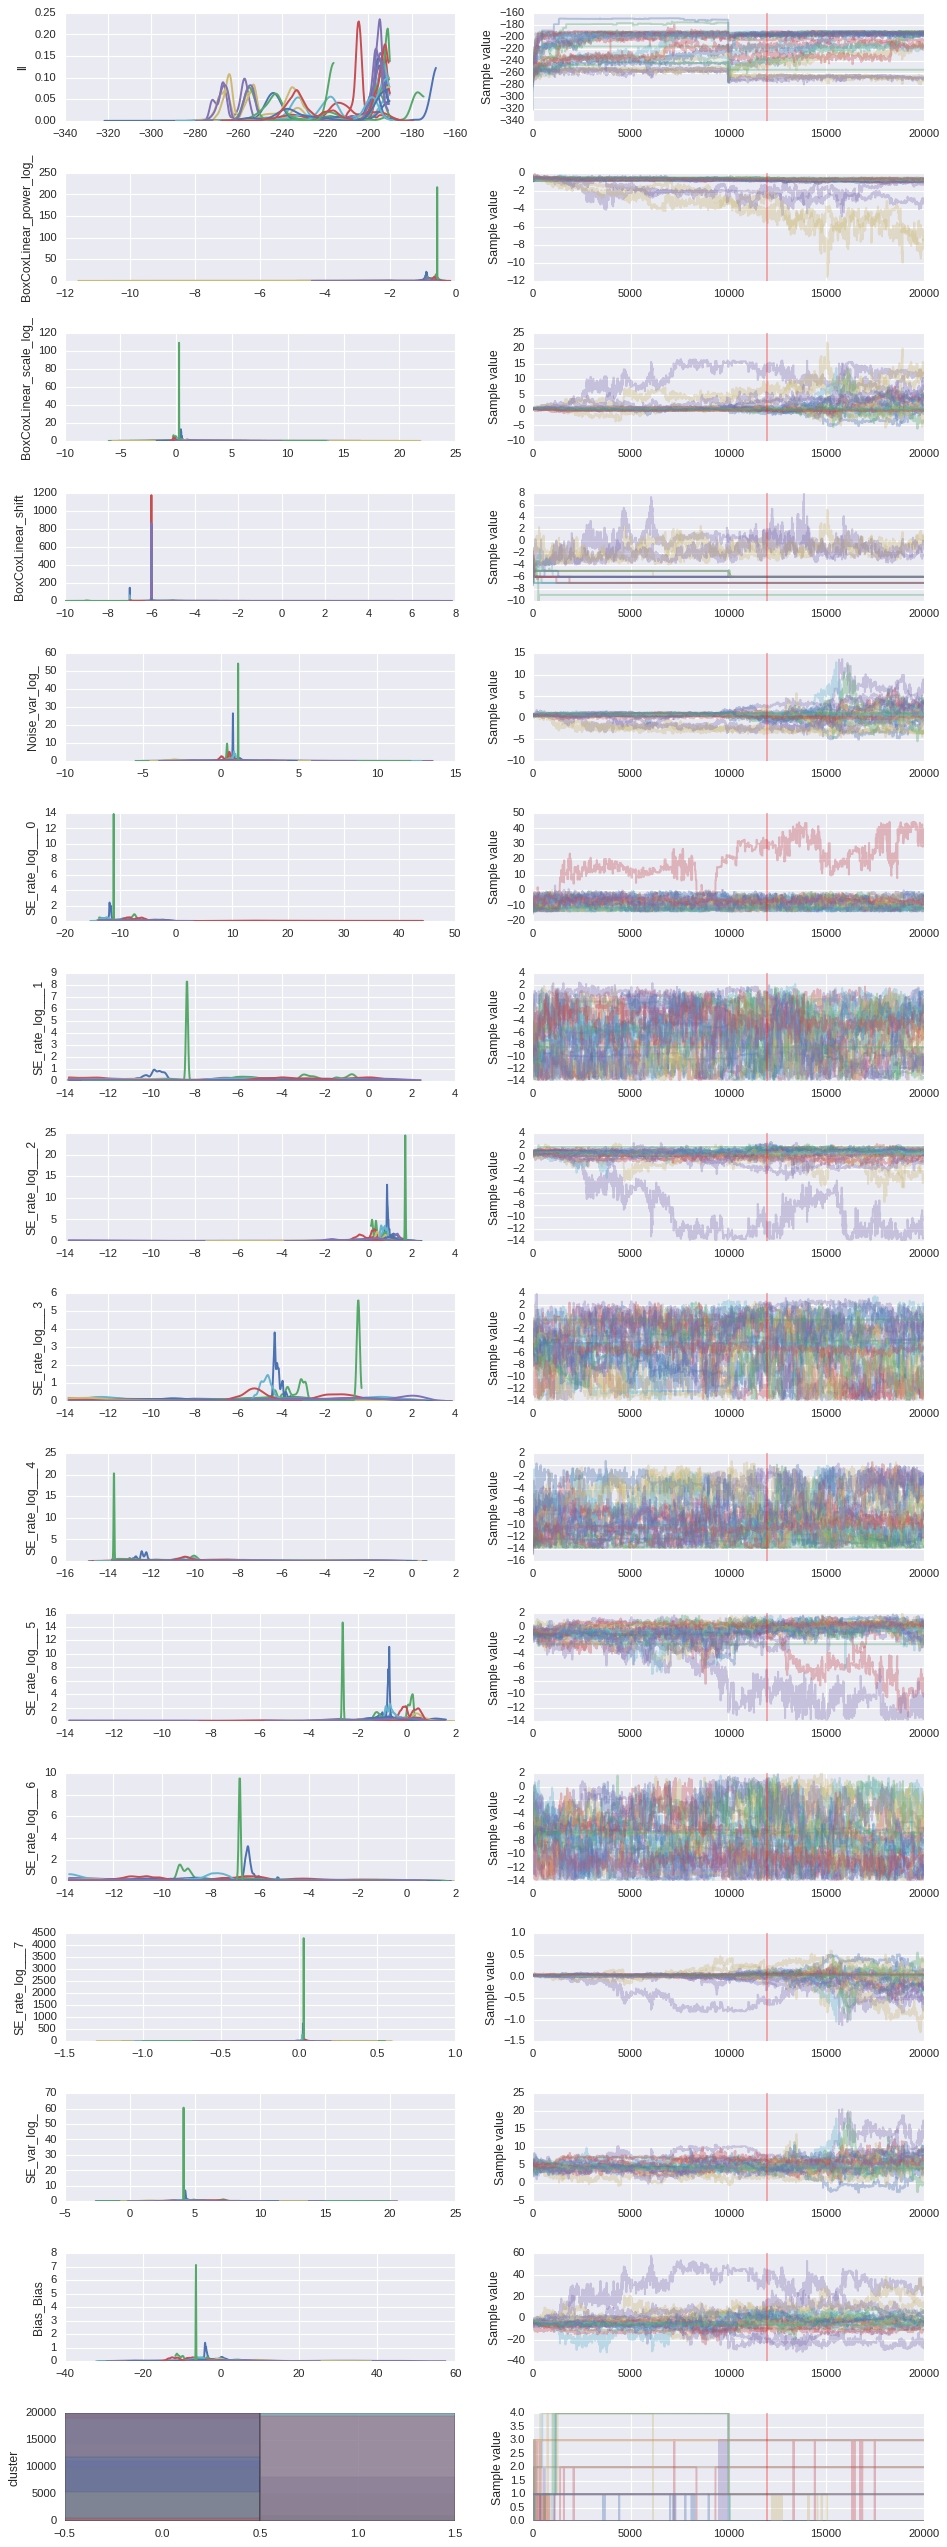

In [31]:
g3.plot_datatrace(datatrace)

## Plot Marginal Histograms

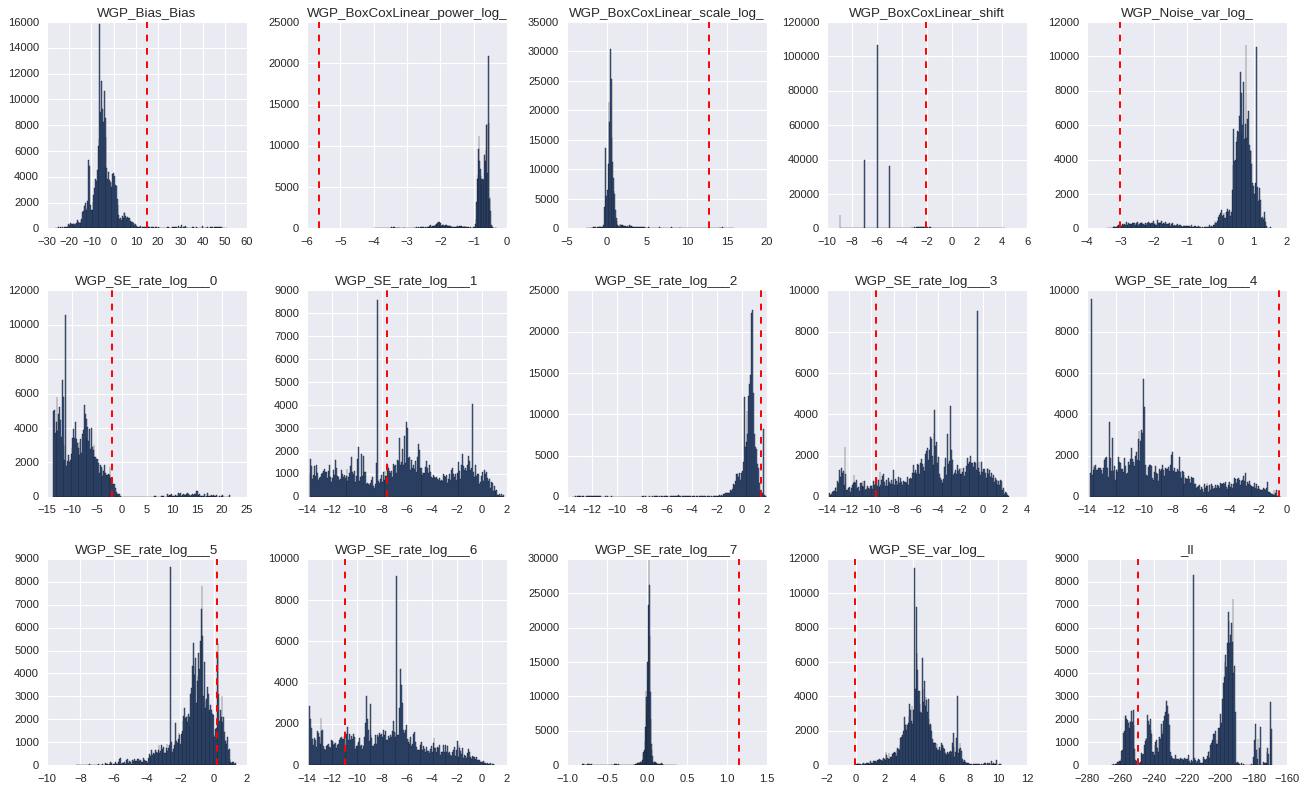

In [12]:
g3.hist_datatrace(datatrace, reference=gp.eval_params(params))

In [14]:
g3.cluster_datatrace(gp, datatrace)

<function g3py.bayesian.average.cluster_datatrace.<locals>._cluster>

In [ ]:
gp.scores(params=gp.active.params_datatrace(datatrace, 0))

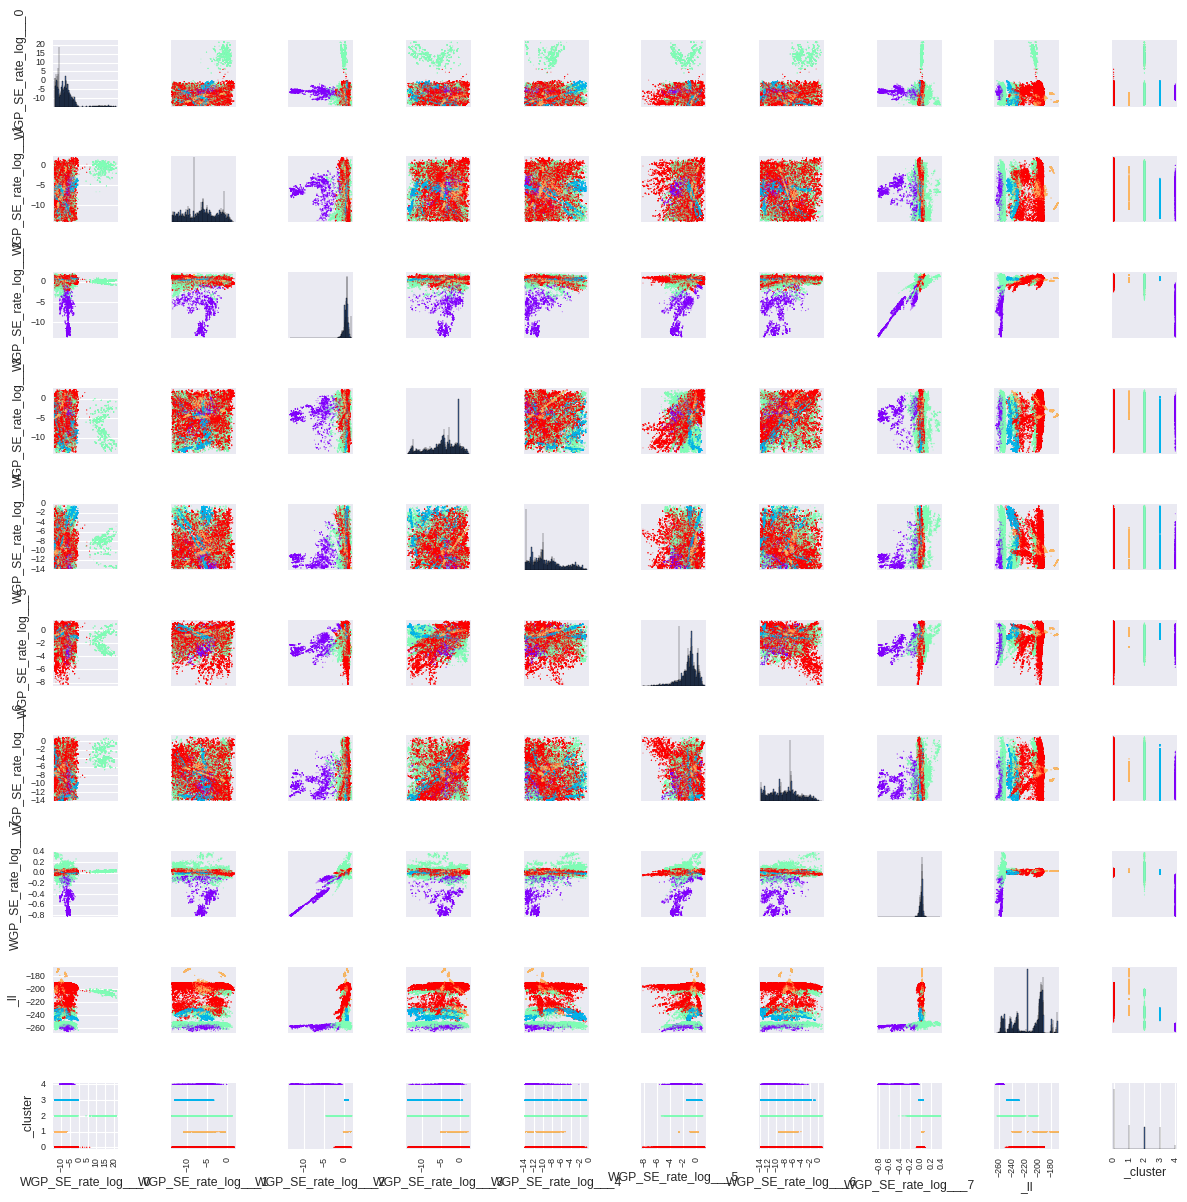

In [70]:
g3.scatter_datatrace(datatrace, regex='rate|_ll|_cluster')

In [71]:
candidates = g3.find_candidates(datatrace, ll=1, by_cluster=True)
candidates

WGP_BoxCoxLinear_power_log_  WGP_BoxCoxLinear_scale_log_  \
ll[67097]                     -0.862621                     0.393452   
ll[137390]                    -0.782216                     0.458407   
ll[29417]                     -0.820255                     0.401254   
ll[229847]                    -0.587064                     0.619505   
ll[34204]                     -1.761302                     4.512736   

            WGP_BoxCoxLinear_shift  WGP_Noise_var_log_  WGP_SE_rate_log___0  \
ll[67097]                -7.000000            0.755054           -11.672995   
ll[137390]               -6.000001            0.678082           -12.811189   
ll[29417]                -6.000000            0.603764             8.594371   
ll[229847]               -5.000000            0.643319            -8.068569   
ll[34204]                -2.537783           -0.496383            -6.383469   

            WGP_SE_rate_log___1  WGP_SE_rate_log___2  WGP_SE_rate_log___3  \
ll[67097]             -9.340691             0.832664            -4.126732   
ll[137390]            -8.465646             0.810645            -4.593546   
ll[29417]             -2.186137             0.741432            -6.914638   
ll[229847]            -8.749527             0.481453           -12.354058   
ll[34204]             -7.635327            -2.083504            -1.793337   

            WGP_SE_rate_log___4  WGP_SE_rate_log___5  WGP_SE_rate_log___6  \
ll[67097]            -12.122416            -0.685643            -6.595927   
ll[137390]           -11.923059            -0.869937            -7.321804   
ll[29417]            -12.014171            -0.857623            -3.441870   
ll[229847]            -5.795658            -0.055699           -12.931829   
ll[34204]            -12.672797            -1.901725            -5.249439   

            WGP_SE_rate_log___7  WGP_SE_var_log_  WGP_Bias_Bias  _nchain  \
ll[67097]              0.026105         4.307195      -4.197917        6   
ll[137390]             0.020518         4.461918      -4.975571       13   
ll[29417]              0.039574         4.575549       2.332305        2   
ll[229847]            -0.002949         4.395765      -2.565357       22   
ll[34204]             -0.111930         6.509901      10.912560        3   

            _niter  _burnin  _outlayer         _ll  _cluster  
ll[67097]     7097     True       True -168.925217         1  
ll[137390]    7390     True       True -190.728394         0  
ll[29417]     9417     True       True -199.846085         2  
ll[229847]    9847     True       True -230.030792         3  
ll[34204]     4204     True       True -252.848801         4

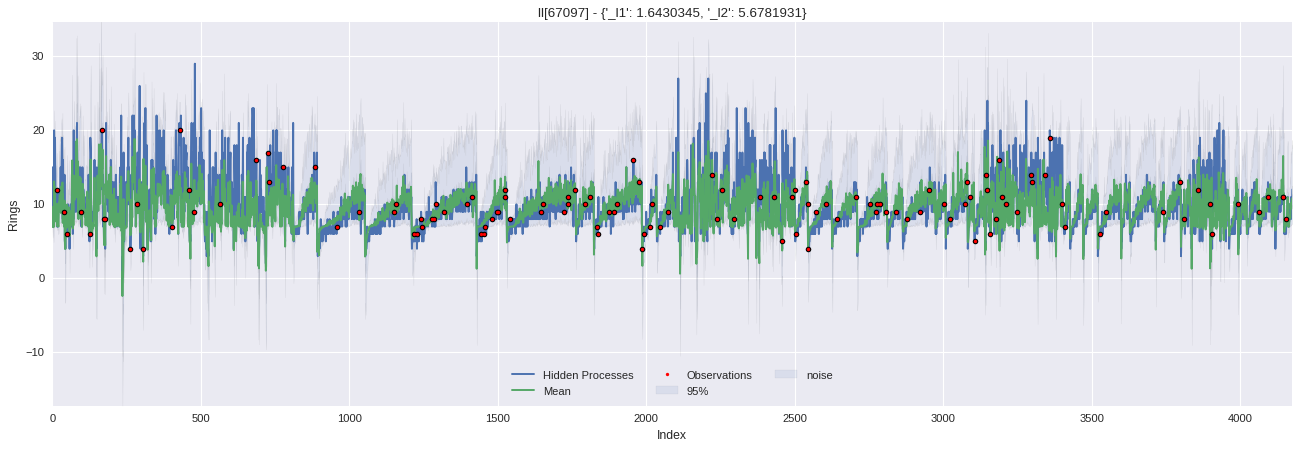

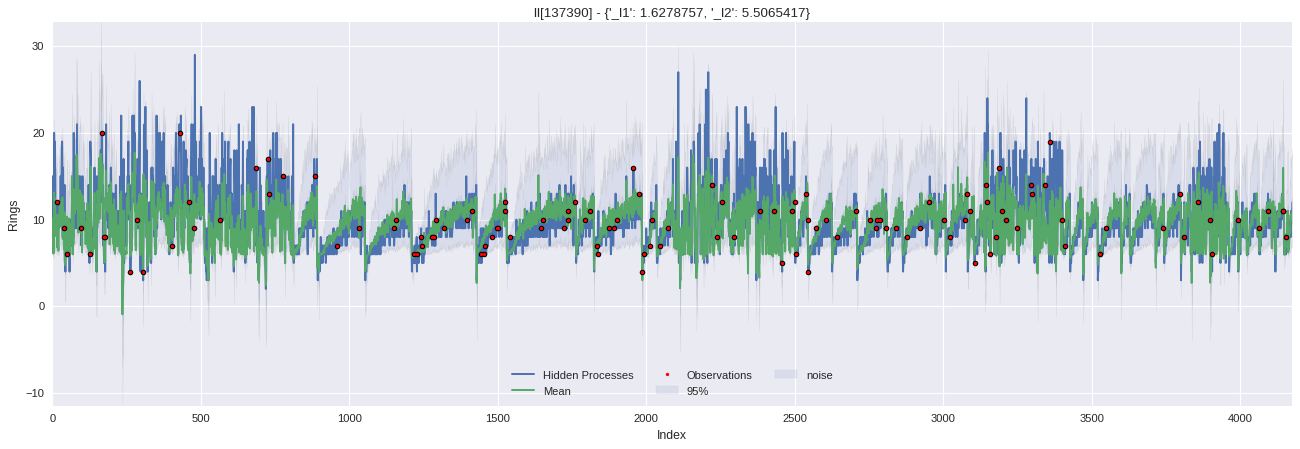

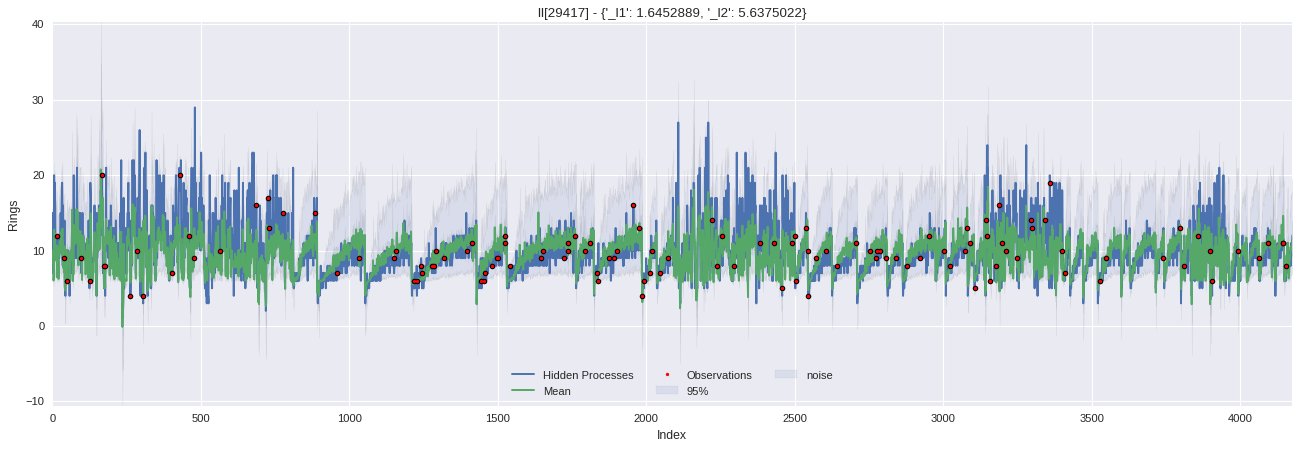

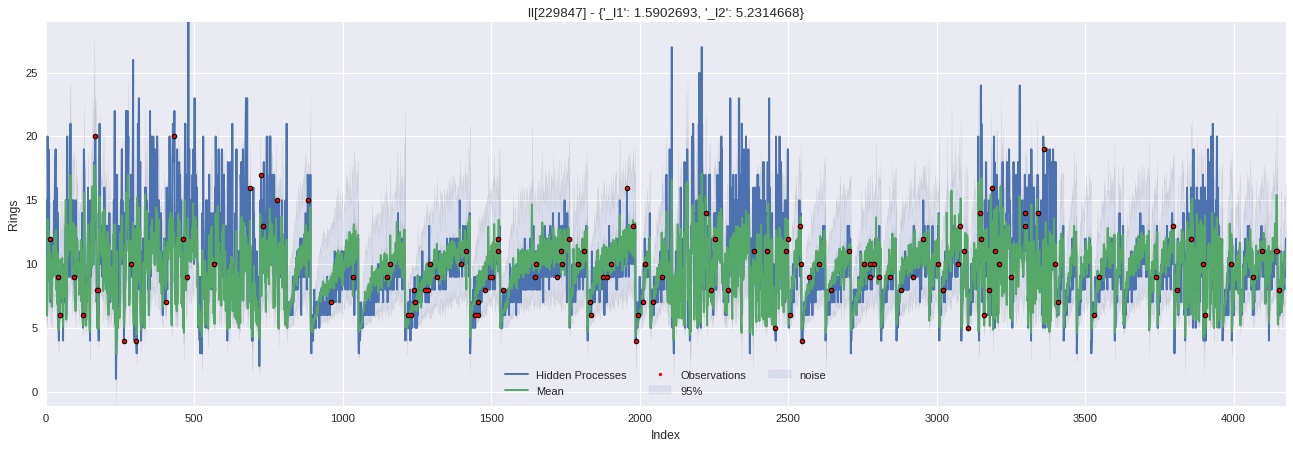

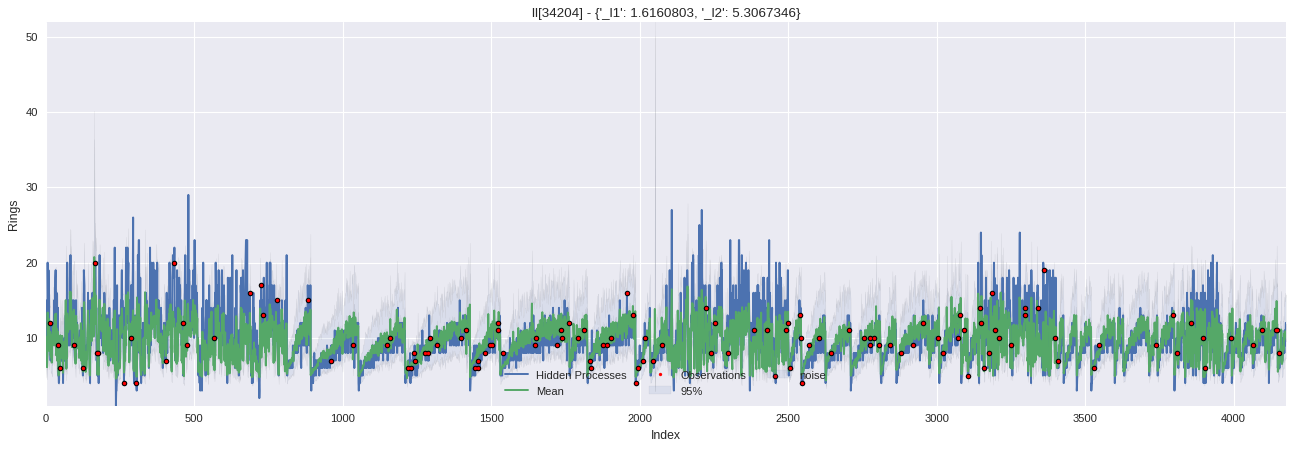

In [18]:
gp.plot_datatrace(candidates)

## Fixing Parameters

In [72]:
gp.compiles.array_posterior_logp

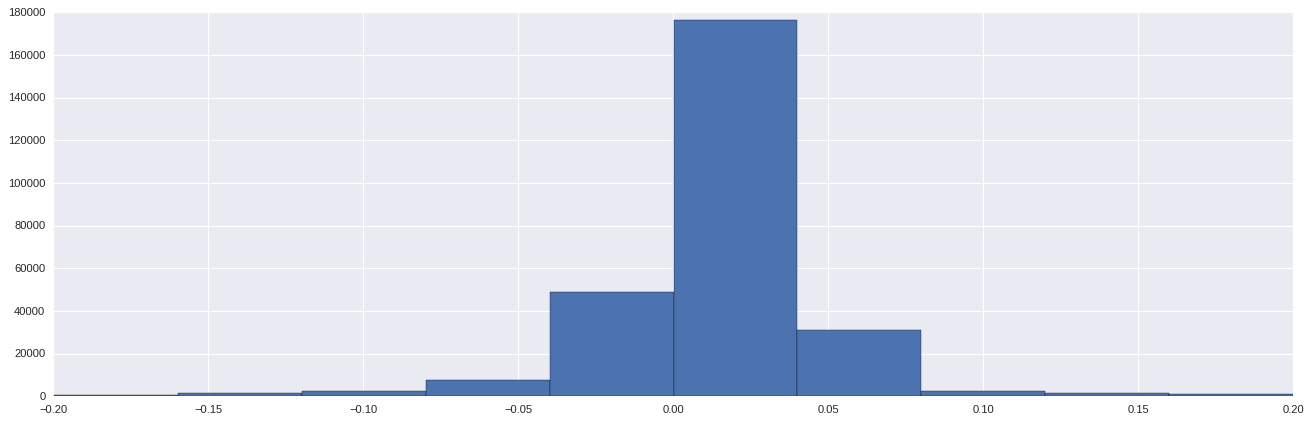

In [99]:
datatrace.WGP_SE_rate_log___7[(datatrace.WGP_SE_rate_log___7 > -0.2) & (datatrace.WGP_SE_rate_log___7 < 0.2)].hist()

In [100]:
datatrace.WGP_SE_rate_log___7[(datatrace.WGP_SE_rate_log___7 > -0.2) & (datatrace.WGP_SE_rate_log___7 < 0.2)].mean()

0.01689841342173818

In [101]:
datatrace.WGP_SE_rate_log___7[(datatrace.WGP_SE_rate_log___7 > -0.2) & (datatrace.WGP_SE_rate_log___7 < 0.2)].median()

0.0228584939837033

In [102]:
datatrace.WGP_SE_rate_log___7[(datatrace.WGP_SE_rate_log___7 > -0.2) & (datatrace.WGP_SE_rate_log___7 < 0.2)].mode()

0    0.030078
dtype: float64

In [103]:
fix_params = {'WGP_SE_rate_log___7' : 0.03}

In [104]:
gp.fix_params(fix_params)

AttributeError: 'WarpedGaussianProcess' object has no attribute 'fix_params'

## Fix/Marginalise Parameters